In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
%matplotlib inline
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Loading the dataset
iris = pd.read_csv('Iris3.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm\t,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm\t,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm\t',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [5]:
iris.columns = ['id','sepal_length','sepal_width','petal_length','petal_width','class']
iris.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'class'],
      dtype='object')

In [6]:
# Checking for null values
iris.isna().sum()

id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
# Dropping Unnecessary Columns
iris.drop('id',axis=1,inplace=True)

# checking for columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [8]:
# Showing Information about the Dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


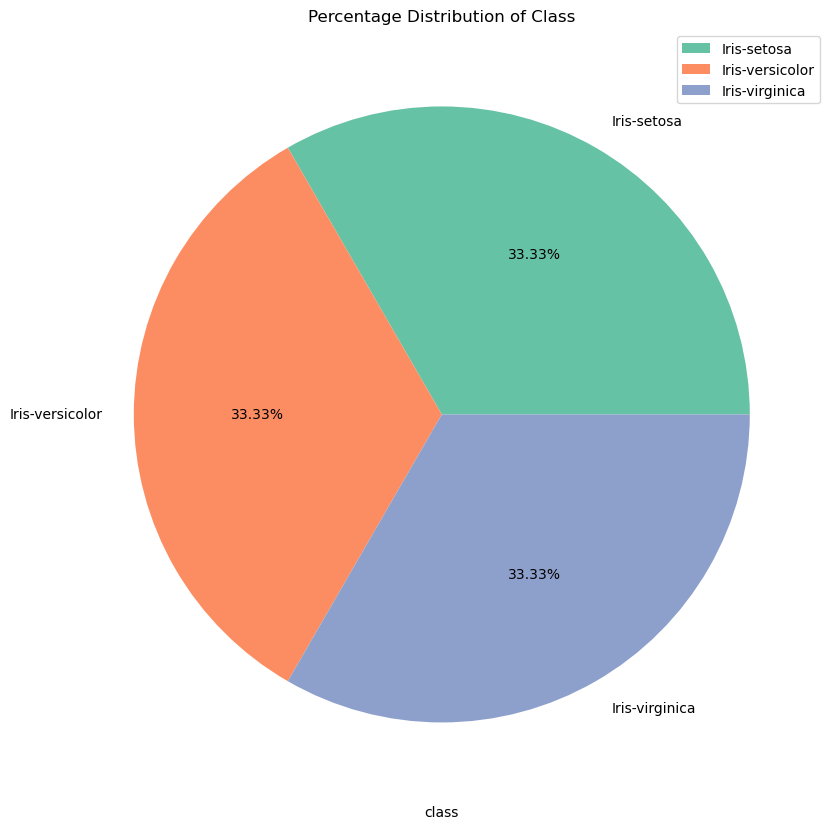

In [9]:
# Finding Percentage Distribution of Class
plt.figure(figsize=(20,10))
iris['class'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Percentage Distribution of Class')
plt.legend(iris['class'].value_counts().index)
plt.xlabel('class')
plt.ylabel(None)
plt.show()

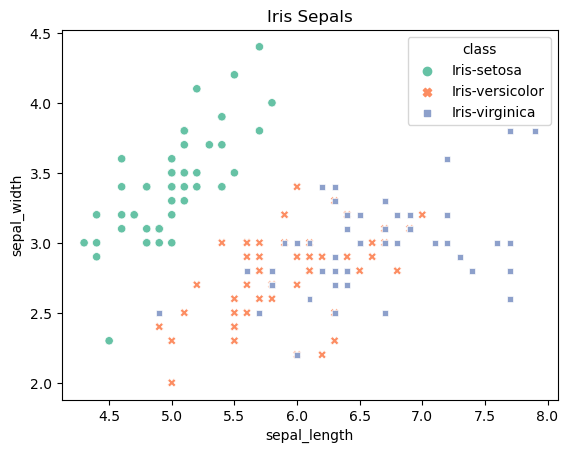

In [10]:
# Showing Relationship Between Sepal_Length and Sepal_Width on the basis of Class
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='class', style='class')
plt.title('Iris Sepals')
plt.show()

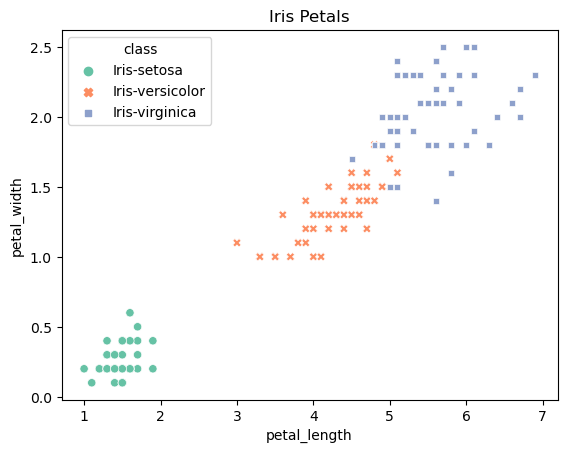

In [11]:
# Showing Relationship Between Petal_Length and Petal_Width on the basis of Class
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='class', style='class')
plt.title('Iris Petals')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

In [13]:
iris['class'] = le.fit_transform(iris['class'])
iris['class'].unique()


array([0, 1, 2])

In [14]:
x = iris.drop(['class'],axis=1)
y = iris['class']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [19]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred,zero_division=0))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

In [20]:
# Building the knnClassifier Model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.9732142857142857
Testing Score 0.9736842105263158


In [22]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]


In [23]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)


[[11  0  0]
 [ 0 14  1]
 [ 0  0 12]]
Accuracy Score 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [24]:
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn*100)

Accuracy Score 97.36842105263158
